In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [57]:
data=load_breast_cancer()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])

In [17]:
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
169,14.97,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,...,16.11,23.00,104.60,793.7,0.1216,0.16370,0.06648,0.08485,0.2404,0.06428
480,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,0.06284,...,13.34,27.87,88.83,547.4,0.1208,0.22790,0.16200,0.05690,0.2406,0.07729
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.04580,0.04044,0.2383,0.07083
543,13.21,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.03275,0.1628,0.05781,...,14.37,37.17,92.48,629.6,0.1072,0.13810,0.10620,0.07958,0.2473,0.06443
113,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,...,11.16,22.75,72.62,374.4,0.1300,0.20490,0.12950,0.06136,0.2383,0.09026
528,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.1394,0.13640,0.15590,0.10150,0.2160,0.07253
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,20.96,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230
372,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.1552,0.40560,0.49670,0.18380,0.4753,0.10130


PCA VISUALIZATION

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [20]:
from sklearn.decomposition import PCA

In [22]:
pca=PCA(n_components=2)

In [23]:
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

scaled_data.shape

(569, 30)

In [45]:
x_pca.shape

(569, 2)

No handles with labels found to put in legend.


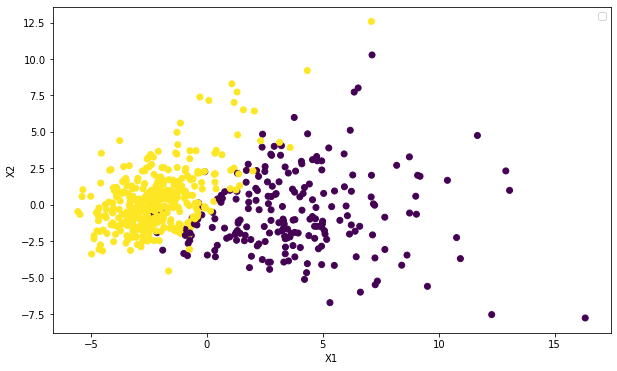

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['target'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [58]:
X, y = load_breast_cancer(return_X_y = True)

In [59]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [64]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [67]:
pca = PCA(n_components = 2).fit(X_scaled)
pca_X = pca.transform(X_scaled)

In [68]:
pca_X.shape

(569, 2)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2,random_state=1)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [79]:
print("Accuracy on training set {}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set {}".format(accuracy_score(y_test, y_pred)))

Accuracy on training set 0.9472527472527472
Accuracy on test set 0.9473684210526315


In [80]:
print(confusion_matrix(y_test,y_pred))

[[37  5]
 [ 1 71]]
